In [126]:
!pip install catboost

#import libraries

In [139]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import xgboost as xgb
from catboost import CatBoostRegressor
from sklearn.svm import SVR


#Load the wine dataset

In [151]:
data =load_wine().data
df = pd.DataFrame(data,columns=load_wine().feature_names)
feature_names = load_wine().feature_names
X = df.drop(['alcohol'], axis=1)
y = df['alcohol']
df.head()


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [141]:
df.shape

(178, 13)

In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

In [143]:
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [146]:
df.describe().loc[['min', 'max']].T

,min,max
alcohol,11.03,14.83
malic_acid,0.74,5.80
ash,1.36,3.23
alcalinity_of_ash,10.60,30.00
magnesium,70.00,162.00
total_phenols,0.98,3.88
flavanoids,0.34,5.08
nonflavanoid_phenols,0.13,0.66
proanthocyanins,0.41,3.58
color_intensity,1.28,13.00


In [144]:
X.isna().sum().sum()

0

In [145]:
X.duplicated().sum()

0

In [156]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    random_state=42)


In [157]:
# scale the features
mms = MinMaxScaler()
X_train = mms.fit_transform(X_train)
X_test = mms.transform(X_test)


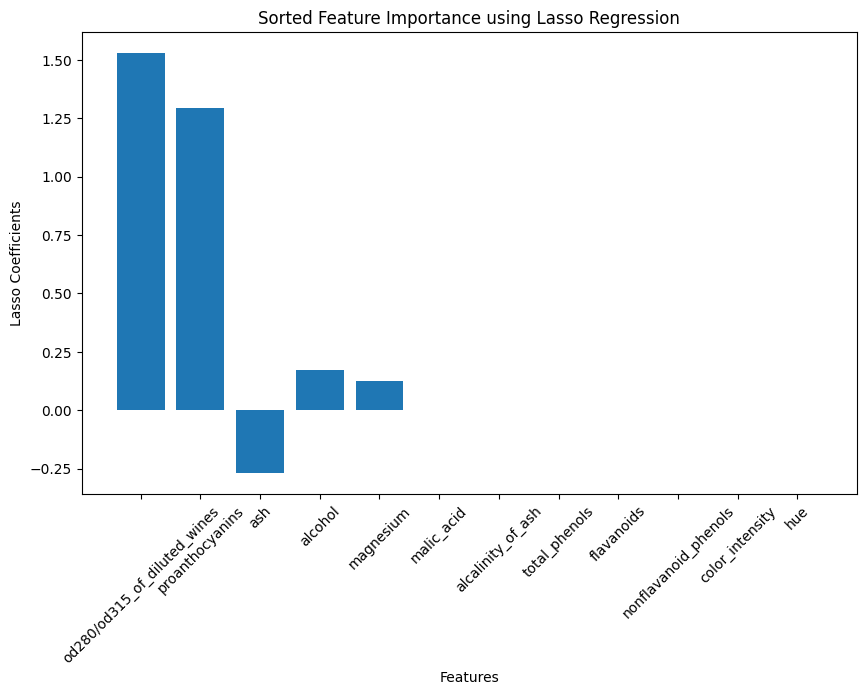

Features sorted by importance (most to least):
od280/od315_of_diluted_wines: 1.5294
proanthocyanins: 1.2937
ash: -0.2693
alcohol: 0.1701
magnesium: 0.1262
malic_acid: 0.0000
alcalinity_of_ash: -0.0000
total_phenols: 0.0000
flavanoids: -0.0000
nonflavanoid_phenols: -0.0000
color_intensity: 0.0000
hue: 0.0000


In [158]:
# Create a Lasso regression model with a specific alpha (regularization strength)
lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)
coefficients = lasso.coef_

# Combine feature names and coefficients into a list of tuples
feature_importance = list(zip(feature_names, coefficients))

# Sort the features by the absolute value of their coefficients in descending order
sorted_features = sorted(feature_importance, key=lambda x: abs(x[1]), reverse=True)

# Extract the sorted feature names
sorted_feature_names = [feature for feature, coef in sorted_features]

# Plot the sorted coefficients
sorted_coefficients = [coef for feature, coef in sorted_features]

plt.figure(figsize=(10, 6))
plt.bar(sorted_feature_names, sorted_coefficients)
plt.xlabel('Features')
plt.ylabel('Lasso Coefficients')
plt.title('Sorted Feature Importance using Lasso Regression')
plt.xticks(rotation=45)
plt.show()

# Print the sorted features from most important to least important
print("Features sorted by importance (most to least):")
for feature, coef in sorted_features:
    print(f"{feature}: {coef:.4f}")


In [170]:
# Extract the sorted feature names
important_features = [feature for feature, coef in sorted_features if coef != 0]
print("Selected features:", important_features)

# Create new datasets with only important features
X_train_selected = X_train[:, [feature_names.index(f) for f in important_features]]
X_test_selected = X_test[:, [feature_names.index(f) for f in important_features]]

# Models to evaluate
models = {
    'LR': LinearRegression(),
    'KNN': KNeighborsRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'CatBoost': CatBoostRegressor(verbose=0),
    'XGBoost': xgb.XGBRegressor(),
    'SVR': SVR(kernel='rbf', C=1.0, epsilon=0.1)
}

# Train and evaluate each model
for model_name, model in models.items():
    print(f"\nTraining {model_name}...")
    model.fit(X_train_selected, y_train)

    # Predict and evaluate
    y_pred = model.predict(X_test_selected)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    BOLD = '\033[1m'
    RESET = '\033[0m'
    print(f"{BOLD}--------------------------------------------------{RESET}")
    print(f"{BOLD}{model_name}{RESET}: - Mean Squared Error: {mse:.4f}")
    print(f"{BOLD}{model_name}{RESET}: - R^2 Score: {r2:.4f}")
    print(f"{BOLD}--------------------------------------------------{RESET}")


Selected features: ['od280/od315_of_diluted_wines', 'proanthocyanins', 'ash', 'alcohol', 'magnesium']

Training LR...
--------------------------------------------------
LR: - Mean Squared Error: 0.1701
LR: - R^2 Score: 0.7150
--------------------------------------------------

Training KNN...
--------------------------------------------------
KNN: - Mean Squared Error: 0.1250
KNN: - R^2 Score: 0.7906
--------------------------------------------------

Training Decision Tree...
--------------------------------------------------
Decision Tree: - Mean Squared Error: 0.3691
Decision Tree: - R^2 Score: 0.3817
--------------------------------------------------

Training Random Forest...
--------------------------------------------------
Random Forest: - Mean Squared Error: 0.1423
Random Forest: - R^2 Score: 0.7616
--------------------------------------------------

Training CatBoost...
--------------------------------------------------
CatBoost: - Mean Squared Error: 0.1379
CatBoost: - R^2 S